## Enigme 1
###### Les deux gardiens sont liés par une règle : l'un dit toujours la vérité, l'autre ment toujours. Vous ne savez pas qui est qui. Vous pouvez leur poser une seule question à l'un des deux gardiens. Quelle question poser pour savoir quelle porte mène au trésor ?

### Chaque gardien donne sa reponse
Qbit 0 : Gardien de droite
Qbit 1 : Gardien de gauche
Qbit 2 : Mensonge

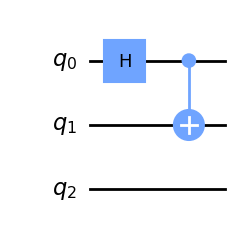

In [25]:
from qiskit import QuantumCircuit, Aer

circ_enigme = QuantumCircuit(3)
circ_enigme.h(0)
circ_enigme.cx(0,1)
circ_enigme.draw(output='mpl')

### Ligne de mensonge
Pour etre sur de gerer le mensonge,
On ajoute une porte CNOT sur le qbit 2 et le qbit 1 suivi d'une porte X sur le qbit 2 pour inverser le resultat
Cela a pour effet que si les QBit 1 et 2 sont dans le méme état alors le QBit 1 est inversé
__Exemple :__
0----h----cx------------0
0----------cx----cx----0
1----h------------cx----1


On ajoute une porte CNOT sur le qbit 2 et le qbit 0 suivi d'une porte X sur le qbit 2 pour inverser le resultat
Cela a pour effet que si les QBit 0 et 2 sont dans le méme état alors le QBit 1 est inversé
0----h----cx------------------cx------------1
0----------cx----cx--------------------------0
0----h------------cx----x----cx----x----0


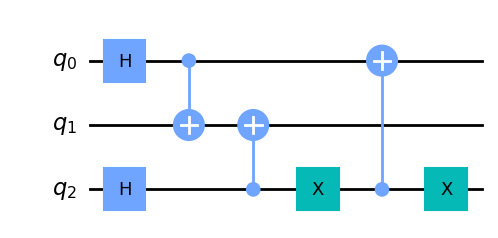

In [26]:
circ_enigme.h(2)
circ_enigme.cx(2,1)
circ_enigme.x(2)
circ_enigme.cx(2,0)
circ_enigme.x(2)
circ_enigme.draw(output='mpl')

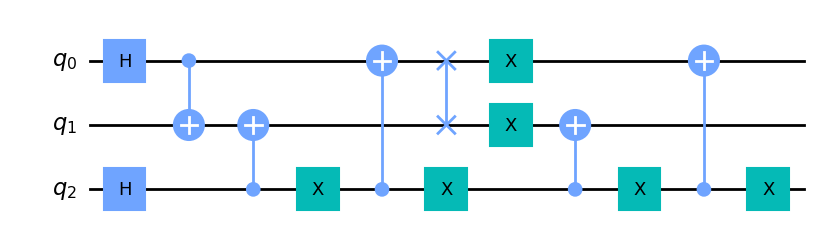

In [27]:
circ_enigme.draw(output='mpl')
circ_enigme.swap(0,1)
circ_enigme.x(0)
circ_enigme.x(1)
circ_enigme.cx(2,1)
circ_enigme.x(2)
circ_enigme.cx(2,0)
circ_enigme.x(2)

circ_enigme.draw(output='mpl')

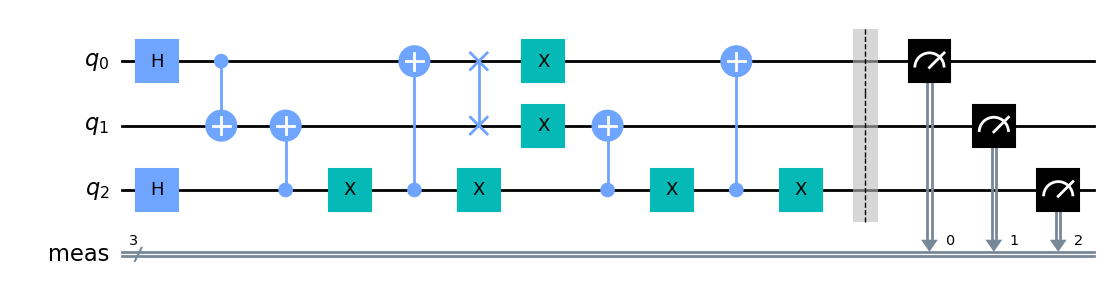

In [28]:
circ_enigme.measure_all()
circ_enigme.draw(output='mpl')

In [29]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ_enigme, shots=100000)
result = job.result()
outputstate = result.get_statevector(circ_enigme, decimals=3)
print(outputstate)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


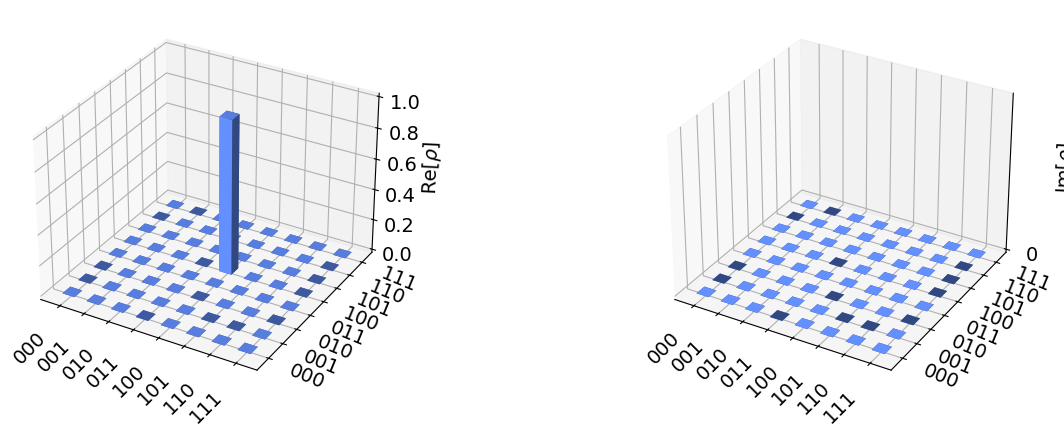

In [30]:
from qiskit.visualization import plot_state_city

plot_state_city(outputstate)